# Analysis Result Visualization

Shows analysis results by wafer from result Excel file.

#### Package Importing

In [1]:
import os
import ipywidgets as widgets
from IPython.display import display
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Showing Result file Dropdown
Run the code cell below and select your Excel file from the drop-down menu that will appear.

Then proceed to the next code cell.

In [2]:
res_path = '../res/'
select_excel_path = ''
excels = [res_path + folder + f'/{folder}_result.xlsx' for folder in os.listdir(res_path) if
          os.path.isdir(os.path.join(res_path, folder))]
excels.append('')
print(excels)
file_dropdown = widgets.Dropdown(
    options=excels,
    description='Select result file:',
    disabled=False,
)


def on_file_select(change):
    global select_excel_path
    selected_file = change['new']
    file_path = os.path.join(res_path, selected_file)
    select_excel_path = file_path


# Connect to event handler
file_dropdown.observe(on_file_select, names='value')

# Display dropdown
display(file_dropdown)

['../res/20240616_123835/20240616_123835_result.xlsx', '../res/20240616_222154/20240616_222154_result.xlsx', '']


Dropdown(description='Select result file:', options=('../res/20240616_123835/20240616_123835_result.xlsx', '..…

#### Load data

In [4]:
# Load Excel file
workbook = openpyxl.load_workbook(select_excel_path)

# Select first sheet
sheet = workbook.active

# Convert data into DataFrame
data = sheet.values
columns = next(data)  # Use first row as column names
df = pd.DataFrame(data, columns=columns)

#### Plot data

Using box plot

In [5]:
def plot_by_wafer(axis, wafers, data_by_wafer, /, title, ylabel):
    # Box plot. Shows average values as ◆
    bplot = axis.boxplot(data_by_wafer, labels=wafers, showfliers=True, showmeans=True, patch_artist=True,
                         meanprops=dict(marker='D', markerfacecolor='black', markeredgecolor='black'),
                         medianprops=dict(color='black', linewidth=1), )

    # Set colors by wafer (blue, orange, green, red)
    colors = ['#1e78b4', '#fa8214', '#32a032', '#d22828']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
    # Set horizontal axis to category name and configure parameters
    axis.set_xticks(ticks=range(1, len(wafers) + 1), labels=wafers)
    axis.set_title(title)
    axis.set_xlabel('Wafer')
    axis.set_ylabel(ylabel)
    axis.tick_params(axis='both', direction='in', which='both')
    axis.grid(True)
    plt.tight_layout()

In [6]:
# Get wafer names
wafers = sorted(set(df['Wafer']))

# Get analysis data → [[data1], [data2], ...]
ref_rsquared = [list(df.loc[df['Wafer'] == wafer, 'Rsq of Ref. spectrum (6th)']) for wafer in wafers]
ref_max_transmission = [list(df.loc[df['Wafer'] == wafer, 'Max transmission of Ref. spectrum (dBm)']) for wafer in
                        wafers]
current_at_minus_1V = [list(df.loc[df['Wafer'] == wafer, 'I at -1V (A)']) for wafer in wafers]
current_at_plus_1V = [list(df.loc[df['Wafer'] == wafer, 'I at +1V (A)']) for wafer in wafers]

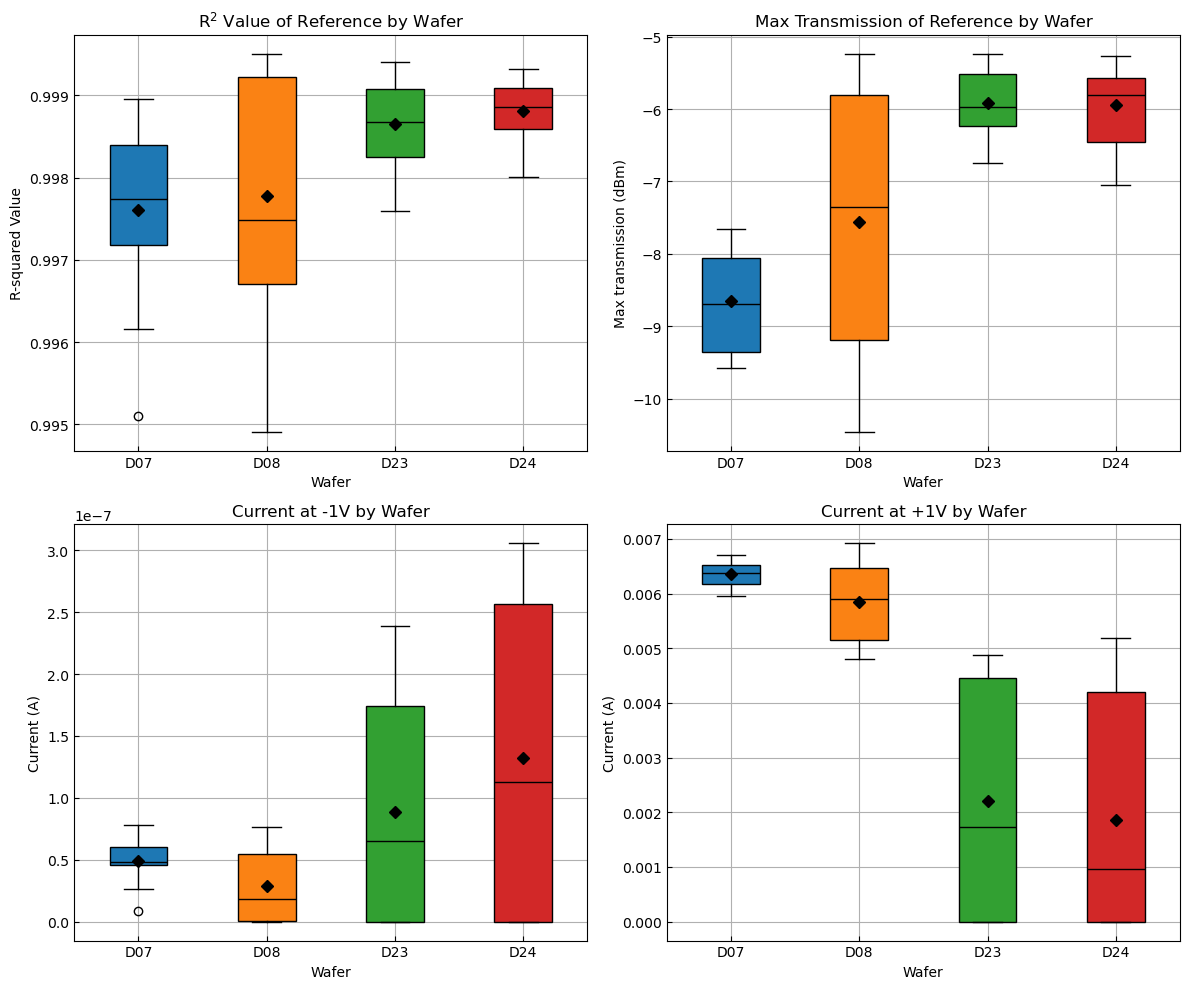

In [7]:
# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Plot each data
plot_by_wafer(ax1, wafers, ref_rsquared, title='R$^2$ Value of Reference by Wafer', ylabel='R-squared Value')
plot_by_wafer(ax2, wafers, ref_max_transmission, title='Max Transmission of Reference by Wafer',
              ylabel='Max transmission (dBm)')
plot_by_wafer(ax3, wafers, current_at_minus_1V, title='Current at -1V by Wafer', ylabel='Current (A)')
plot_by_wafer(ax4, wafers, current_at_plus_1V, title='Current at +1V by Wafer', ylabel='Current (A)')